First, let's import the necessary libraries and load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Most algorithms (especially KNN and SVM) perform poorly if data isn't scaled (normalized). We will split the data into training and testing sets, then scale the features.

In [2]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() # MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation complete.")

Data preparation complete.


Logistic Regression

Concept: Despite the name, this is a linear classification model. It uses the logistic function (sigmoid) to squeeze the output of a linear equation between 0 and 1, representing a probability.

- Advantages: Simple, fast, highly interpretable (you can see which feature affects the outcome), and works well on small datasets with linear boundaries.

- Disadvantages: Assumes a linear relationship between features and target. Struggles with complex, non-linear data.

- When to use: When you need a probabilistic result (e.g., "70% chance of rain") or as a first-pass baseline model.

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



K-Nearest Neighbors (KNN)

Concept: KNN is "lazy learning." It doesn't learn a model; instead, it memorizes the training data. To predict a new point, it looks at the 'K' closest neighbors and votes on the class.

- Advantages: Very simple to understand, no training period (instance-based), handles multi-class cases easily.

- Disadvantages: Very slow on large datasets (must calculate distance to every point), sensitive to outliers and irrelevant features. Requires feature scaling.

- When to use: Small datasets, recommender systems, or when the decision boundary is very irregular.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9473684210526315


Support Vector Machine

Concept: SVM tries to find the "hyperplane" (line in 2D) that best separates the classes with the widest margin. It can use "kernels" to project data into higher dimensions to solve non-linear problems.

- Advantages: Effective in high-dimensional spaces (many features), versatile (different kernels), robust against overfitting in high dimensions.

- Disadvantages: Computationally expensive for large datasets, sensitive to noise/overlapping classes, hard to interpret probability.

- When to use: Image classification, text categorization, or complex small-to-medium datasets.

In [5]:
from sklearn.svm import SVC

# Initialize and Train (Using RBF kernel for non-linearity)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9824561403508771


Decision Trees

Concept: A tree-like model of decisions. It splits data into smaller subsets based on feature values (e.g., "Is Radius > 10?") until it reaches a conclusion.

- Advantages: Highly interpretable (can be visualized), requires little data preparation (no scaling needed), handles both numerical and categorical data well.

- Disadvantages: Prone to overfitting (creating overly complex trees that don't generalize). unstable (small data changes result in a different tree).

- When to use: When explainability is key (e.g., medical diagnosis) or as a building block for Random Forests.

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and Train
# Note: We use unscaled data (X_train) because Trees don't require scaling
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9473684210526315


Random Forest

Concept: An "Ensemble" method. It builds many Decision Trees and merges them together (bagging). The final prediction is the average (regression) or majority vote (classification) of all trees.

- Advantages: Very robust, handles overfitting much better than single trees, handles missing values well, provides "Feature Importance" scores.

- Disadvantages: Slow to predict (must run through hundreds of trees), black-box model (harder to interpret than a single tree).

- When to use: The "Swiss Army Knife" of ML. Good for almost any tabular dataset where high accuracy is required.

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544


Naive Bayes (Gaussian)

Concept: Based on Bayes' Theorem. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature (Independence assumption).

- Advantages: Extremely fast (training and prediction), works well with high-dimensional data, performs well with small training data.

- Disadvantages: The "independence" assumption is rarely true in real life, so probability outputs can be inaccurate.

- When to use: Text classification (Spam filtering, Sentiment Analysis), Real-time prediction.

In [7]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9736842105263158


Let's visualize the performance of all models side-by-side.

/tmp/ipython-input-492986540.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


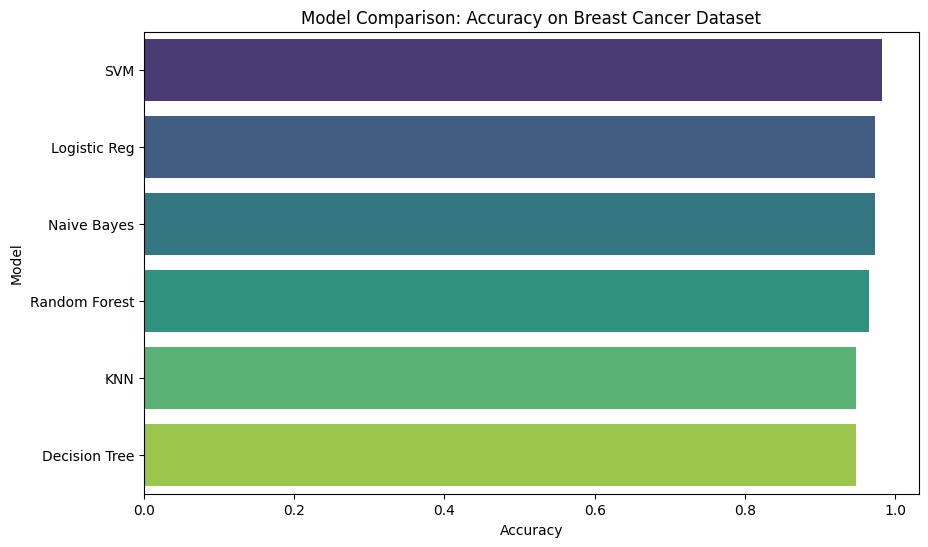

In [10]:
models = ['Logistic Reg', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_nb)
]

results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
results_df = results_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: Accuracy on Breast Cancer Dataset')
plt.xlabel('Accuracy')
plt.show()